In [1]:
import numpy as np

## Numpy array Vs Python Lists

- numpy is faster as it uses (type array/ static array)
- numpy array is not a refrential array, i.e. the array is directly stored into the memory not as an address

- numoy provides the flexibility for the stroage according to the datatype

- numpy array are more flexible and convienece to use

In [6]:
## speed and list

a = [ i for i in range(10000000)]
b = [ i for i in range(10000000, 20000000)]

c = []

import time

start = time.time()

for i in range(len(a)):
    c.append(a[i] + b[i])

print(time.time() - start)

1.7205076217651367


In [7]:
## using numpy

a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a+b

print(time.time() - start)

0.13237380981445312


In [10]:
## in terms of memory
a = [ i for i in range(10000000)]

import sys

sys.getsizeof(a)

89095160

In [12]:
a = np.arange(10000000, dtype=np.int32)
sys.getsizeof(a)

40000112

## Advanced Indexing


In [3]:
## normal indexing and slicing
import numpy as np
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [14]:
a[1,2]

5

In [15]:
a[1:3, 1:3]

array([[4, 5],
       [7, 8]])

### Fancy Indexing

In [16]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
a[[0, 2]] ## Returns 1st and 3rd row

array([[0, 1, 2],
       [6, 7, 8]])

In [21]:
a = np.arange(24).reshape(6, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [22]:
a[[0, 2, 3, 4, 5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [23]:
## for columns

a[:, [0, 2, 3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

### Boolean Indexing

- We get a boolean array with [True, False] values and this array is used as an mask for 

In [25]:
a = np.random.randint(1, 100, 24).reshape(6, 4)
a

array([[90, 79,  4, 14],
       [ 4, 70,  3, 37],
       [90, 27, 52,  6],
       [32, 83, 31, 87],
       [12, 15, 66, 79],
       [48, 76, 88, 48]])

In [27]:
## find all numbers greater than 50

a > 50

array([[ True,  True, False, False],
       [False,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False,  True],
       [False, False,  True,  True],
       [False,  True,  True, False]])

In [28]:
a[a > 50] ### only return the true element from the array and uses the above as a boolean mask 

array([90, 79, 70, 90, 52, 83, 87, 66, 79, 76, 88])

In [29]:
## find out even numbers

a[a % 2 == 0]

array([90,  4, 14,  4, 70, 90, 52,  6, 32, 12, 66, 48, 76, 88, 48])

In [30]:
## find all numbers greater than 50 and are even

# for boolean we need to use bitwise operator & 
a[(a>50) & (a % 2 == 0)]  

array([90, 70, 90, 52, 66, 76, 88])

In [33]:
## find all number not divisible by 7
a[~(a%7 == 0)]

array([90, 79,  4,  4,  3, 37, 90, 27, 52,  6, 32, 83, 31, 87, 12, 15, 66,
       79, 48, 76, 88, 48])

## Broadcasting

We can perform different arthimetic operations between even two numpy array with different or disimilar shapes if we follow a set of rules provides by numpy. The broadcasting is completely done by the numpy side and user don;t need to do anything to achieve this.

- The term broadcasting describes how Numpy treats arrays with different shapes during arithemetic operations
- The smaller array is "broadcasted" across the large array so that they can have compatible shapes for the operations

In [35]:
## same shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

a + b

array([[ 6,  8, 10],
       [12, 14, 16]])

In [37]:
## same shape

a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]


In [38]:
a + b

array([[0, 2, 4],
       [3, 5, 7]])

## Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**

    - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

**2. Make each dimension of the two arrays the same size.**

    - If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.

    - If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

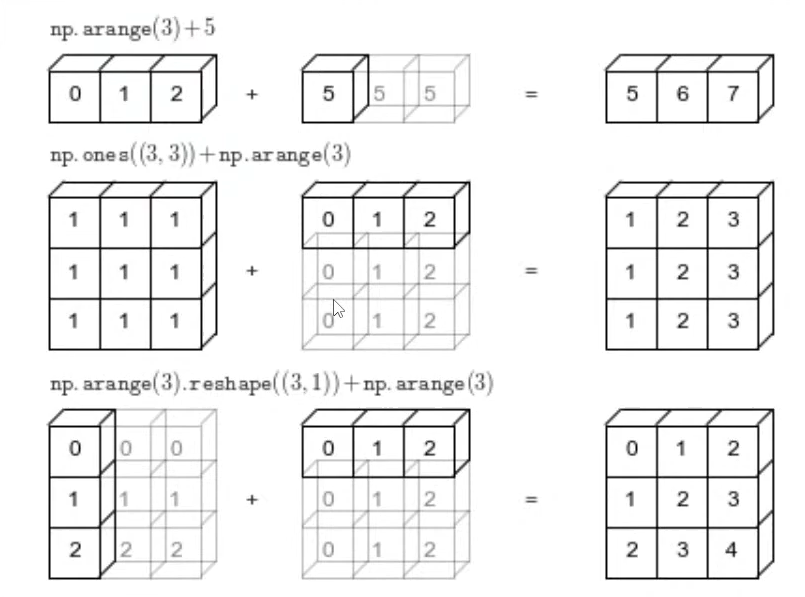

In [42]:
## more examples

a = np.arange(12).reshape(4, 3)
b = np.arange(3)

print(a)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]


In [43]:
print(a + b) 

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [46]:
a = np.arange(12).reshape(3, 4)
b = np.arange(3)

print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


In [48]:
print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [50]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]]


In [52]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [54]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]


In [55]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [56]:
a = np.array([1])
# shape is (1,1)

b = np.arange(4).reshape(2,2)
## shape is (2,2)

print(a)
print(b)

[1]
[[0 1]
 [2 3]]


In [57]:
print(a+b)

[[1 2]
 [3 4]]


In [58]:
 a = np.arange(12).reshape(3, 4)
b = np.arange(12).reshape(4, 3)

print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [59]:
 print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [60]:
 a = np.arange(16).reshape(4, 4)
b = np.arange(4).reshape(2, 2)

print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


In [62]:
print(a+b)

ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

## Working with mathematical functions

In [64]:
a= np.arange(10)

np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

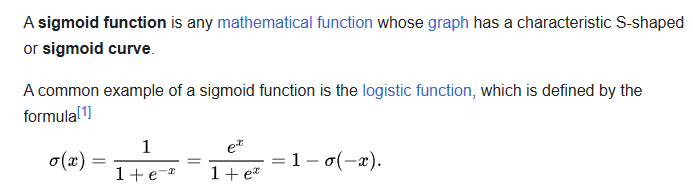

In [68]:
## Sigmoid

def sigmoid(array):

    return 1/(1+ np.exp(-(array)))

a= np.arange(10)

sigmoid(a)


array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

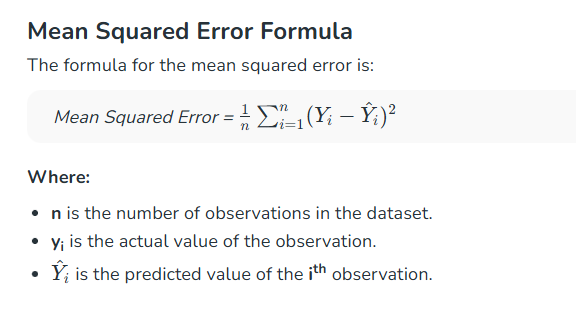

In [69]:
## mean squared error (actual - predicted) ^2

actual = np.random.randint(1, 100, 25)
predicted = np.random.randint(1, 100, 25)

print(actual)
print(predicted)


[47 57 77 66 13 82 13 79 37 88 25 64 68 65 81 24 77 43 86 60 13 20 96 18
 41]
[62 69 57 77 88 22 93 40 94 48 45 90 97 93 97 51 23 10 56  3 37 73 78 42
 63]


In [70]:
def mse(actual, predicted):

    return  np.mean((actual - predicted)**2)

mse(actual, predicted)
    

1579.76

## Working with missing values

In [71]:
## working with missing values

a = np.array([1, 2, 3, 4, np.nan, 6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [73]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [74]:
a[np.isnan(a)]

array([nan])

In [75]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

## Plotting Grpahs

In [77]:
# plotting 2d plot

# x=y

x = np.linspace(-10, 10, 100)

y = x

y

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

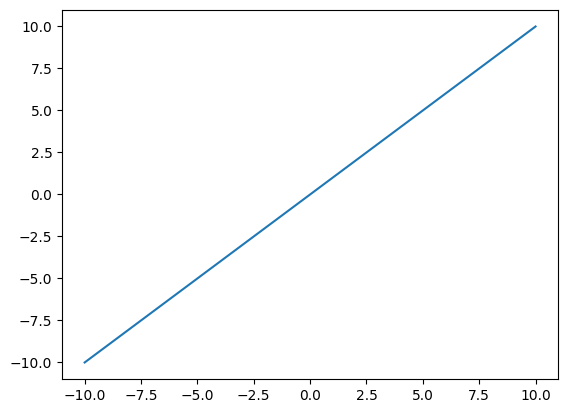

In [79]:
import matplotlib.pyplot as plt

plt.plot(x,y)

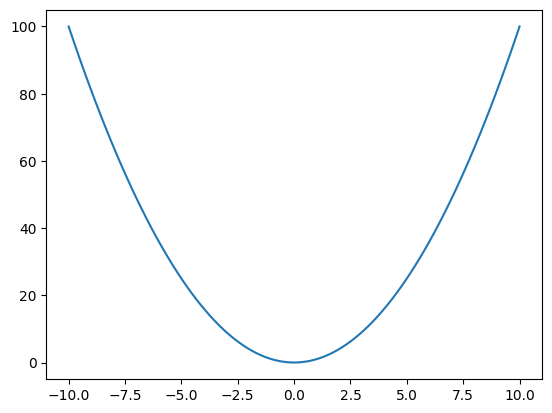

In [80]:
# y =x^2

x = np.linspace(-10, 10, 100)

y = x**2

plt.plot(x, y)

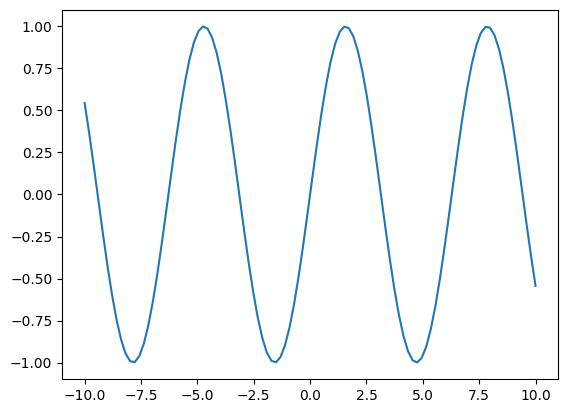

In [83]:
# y= sinx

x = np.linspace(-10, 10, 100)

y = np.sin(x)

plt.plot(x, y)

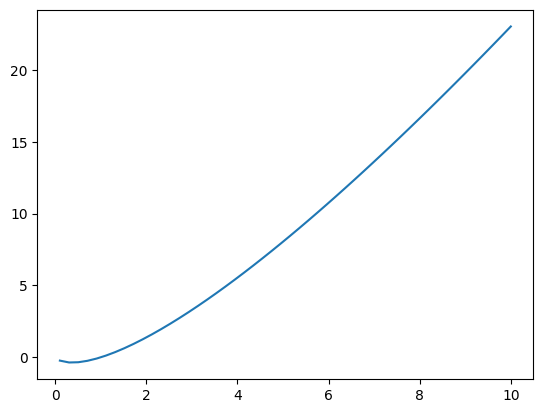

In [84]:
# y = xlogx

x = np.linspace(-10, 10, 100)

y = x * np.log(x)

plt.plot(x, y)


# In build numpy functions

## np.sort 

#### return a sorted copy of an array

In [2]:
import numpy as np

a = np.random.randint(1, 100, 15)
a

array([87,  1,  4, 36, 88, 13, 52, 86, 62, 85, 52,  5,  2, 37, 22])

In [3]:
b = np.random.randint(1, 100, 24).reshape(6,4)
b

array([[49, 86, 85, 13],
       [46, 20, 70, 17],
       [30, 95, 35, 12],
       [12, 35, 81, 68],
       [48, 93, 19, 56],
       [71, 83, 96, 52]])

In [4]:
np.sort(a)

array([ 1,  2,  4,  5, 13, 22, 36, 37, 52, 52, 62, 85, 86, 87, 88])

In [90]:
np.sort(b)

array([[14, 26, 46, 63],
       [33, 65, 96, 97],
       [43, 47, 51, 94],
       [40, 61, 78, 90],
       [20, 71, 80, 91],
       [21, 30, 68, 74]])

In [91]:
np.sort(b, axis = 0) ## column wise sorting

array([[21, 40, 20, 14],
       [26, 51, 46, 30],
       [47, 63, 74, 33],
       [71, 65, 78, 43],
       [90, 68, 94, 61],
       [97, 80, 96, 91]])

In [92]:
np.sort(a)[:: -1]

array([87, 72, 65, 64, 58, 56, 51, 36, 34, 31, 24, 17,  7,  6,  1])

## np.append

The numpy.append() appends values along the mentioned axis at the end of the array

In [93]:
np.append(a, 200)

array([ 51,  56,  31,  87,  17,  36,  24,   7,  72,  34,   6,  64,  58,
        65,   1, 200])

In [94]:
b

array([[26, 63, 46, 14],
       [97, 65, 96, 33],
       [47, 51, 94, 43],
       [90, 40, 78, 61],
       [71, 80, 20, 91],
       [21, 68, 74, 30]])

In [95]:
np.append(b, np.ones((b.shape[0], 1)), axis=1) ## adding new columns

array([[26., 63., 46., 14.,  1.],
       [97., 65., 96., 33.,  1.],
       [47., 51., 94., 43.,  1.],
       [90., 40., 78., 61.,  1.],
       [71., 80., 20., 91.,  1.],
       [21., 68., 74., 30.,  1.]])

## np.concatenate

- function concatenate a sequence of arrays along an existing axis

In [96]:
c = np.arange(6).reshape(2,3)
d = np.arange(6,12).reshape(2,3)

In [97]:
c

array([[0, 1, 2],
       [3, 4, 5]])

In [98]:
d

array([[ 6,  7,  8],
       [ 9, 10, 11]])

In [99]:
np.concatenate((c,d), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [100]:
np.concatenate((c,d), axis=1)

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

## np.unique()

- With the help of np.unique(), we can get the unique values from an array given as parameter in np.unique() method.

In [101]:
## code

e = np.array([1,1,2, 2, 3,3, 4,4,4,5,5,5,5,6,6,66,6,6])

In [102]:
np.unique(e)

array([ 1,  2,  3,  4,  5,  6, 66])

## np.expand_dims

With the help of numpy_expand_dims() methid, we can get the expanded dimension of an array,  from 1D to 2D like this ; like for batches of data requirement

In [103]:
a.shape

(15,)

In [104]:
np.expand_dims(a, axis=0).shape

(1, 15)

In [106]:
np.expand_dims(a, axis=0)

array([[51, 56, 31, 87, 17, 36, 24,  7, 72, 34,  6, 64, 58, 65,  1]])

In [105]:
np.expand_dims(a, axis=1).shape

(15, 1)

## np.where

The numpy.where() function returns the indicies of elements in an input array where the given condition is satisfied

In [107]:
a

array([51, 56, 31, 87, 17, 36, 24,  7, 72, 34,  6, 64, 58, 65,  1])

In [108]:
### get index position where the data value greater than 50 not data get the index position

np.where(a>50)

(array([ 0,  1,  3,  8, 11, 12, 13]),)

In [109]:
## lets say we need to replace all values > 50 with 0
#      np.where(condition, true, false)
np.where(a>50, 0, a)

array([ 0,  0, 31,  0, 17, 36, 24,  7,  0, 34,  6,  0,  0,  0,  1])

## np.argmax

- The numpy.argmax() function returns indices of the max element of the array in a particular axis

In [110]:
a

array([51, 56, 31, 87, 17, 36, 24,  7, 72, 34,  6, 64, 58, 65,  1])

In [111]:
np.argmax(a)  ## return the index of the maximium item from the array

3

In [112]:
b

array([[26, 63, 46, 14],
       [97, 65, 96, 33],
       [47, 51, 94, 43],
       [90, 40, 78, 61],
       [71, 80, 20, 91],
       [21, 68, 74, 30]])

In [114]:
b

array([[26, 63, 46, 14],
       [97, 65, 96, 33],
       [47, 51, 94, 43],
       [90, 40, 78, 61],
       [71, 80, 20, 91],
       [21, 68, 74, 30]])

In [113]:
np.argmax(b, axis=0) ## column wise

array([1, 4, 1, 4])

In [115]:
np.argmin(a)

14

## np.cumsum

- used when we want to compute the cumulative sum of array elements over a give axis

In [117]:
a

array([51, 56, 31, 87, 17, 36, 24,  7, 72, 34,  6, 64, 58, 65,  1])

In [116]:
np.cumsum(a)

array([ 51, 107, 138, 225, 242, 278, 302, 309, 381, 415, 421, 485, 543,
       608, 609])

In [119]:
np.cumsum(b, axis=1)  ### on the basis of rows

array([[ 26,  89, 135, 149],
       [ 97, 162, 258, 291],
       [ 47,  98, 192, 235],
       [ 90, 130, 208, 269],
       [ 71, 151, 171, 262],
       [ 21,  89, 163, 193]])

In [120]:
## np.cumprod

np.cumprod(a)  ## getting the cumulative product

array([                 51,                2856,               88536,
                   7702632,           130944744,          4714010784,
              113136258816,        791953811712,      57020674443264,
          1938702931070976,   11632217586425856,  744461925531254784,
       6285303533393674240, 2716360048978690048, 2716360048978690048])

## np.percentile

numpy.percentile() used to compute the nth percentile of the given data(array elements) along the specified axis.

In [121]:
a

array([51, 56, 31, 87, 17, 36, 24,  7, 72, 34,  6, 64, 58, 65,  1])

In [122]:
np.percentile(a, 100) ## maximum 

87.0

In [124]:
np.percentile(a, 0) ## minimum

1.0

In [125]:
np.percentile(a, 50) ## median

36.0

## np.histogram (freq chart)

numpy has a built-in  function which represents the frequency of data distribution in the graphical form.

In [2]:
np.histogram(a, bins=[0, 20, 40, 60, 80, 100])

(array([2, 5, 4, 1, 3]), array([  0,  20,  40,  60,  80, 100]))

## np.corrcoef

- Return Pearson product-moment correlation coefficients

In [3]:
salary =   np.array([20000, 40000, 50000, 60000, 45000])

experience = np.array([1,3,2,4,2])

np.corrcoef(salary, experience)

array([[1.        , 0.79827173],
       [0.79827173, 1.        ]])

## np.isin

- With the help of this method, we can see that one array  having values are checked in a different numpy array having different elements with different sizes.

In [ ]:
a

array([87,  1,  4, 36, 88, 13, 52, 86, 62, 85, 52,  5,  2, 37, 22])

In [7]:
items = [1, 20, 30, 40, 50, 60, 70, 80 ,90, 100]

np.isin(a, items)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False])